In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x) #avoid scientific notation

In [2]:
# reading csv
dataset = pd.read_csv('yahoo_BTC-USD.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800.000
1,2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200.000
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700.000
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600.000
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100.000
...,...,...,...,...,...,...,...
2444,2021-05-27,39316.891,40379.617,37247.902,38436.969,38436.969,43210968721.000
2445,2021-05-28,38507.082,38856.969,34779.039,35697.605,35697.605,55200191952.000
2446,2021-05-29,35684.156,37234.500,33693.930,34616.066,34616.066,45231013335.000
2447,2021-05-30,34607.406,36400.668,33520.738,35678.129,35678.129,31646080921.000


In [3]:
# checking if close is not equal to adj close
dataset[dataset['Close']!=dataset['Adj Close']]

,Date,Open,High,Low,Close,Adj Close,Volume
2039,2020-04-17,nan,nan,nan,nan,nan,nan
2214,2020-10-09,nan,nan,nan,nan,nan,nan
2217,2020-10-12,nan,nan,nan,nan,nan,nan
2218,2020-10-13,nan,nan,nan,nan,nan,nan


In [4]:
# checking for nulls
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2449 non-null   object 
 1   Open       2445 non-null   float64
 2   High       2445 non-null   float64
 3   Low        2445 non-null   float64
 4   Close      2445 non-null   float64
 5   Adj Close  2445 non-null   float64
 6   Volume     2445 non-null   float64
dtypes: float64(6), object(1)
memory usage: 134.1+ KB


In [5]:
# use close only and fill NaN with ffil
df = dataset.set_index('Date')[['Close']].tail(2000)
df = df.set_index(pd.to_datetime(df.index))
df.fillna(method='ffill',inplace=True)

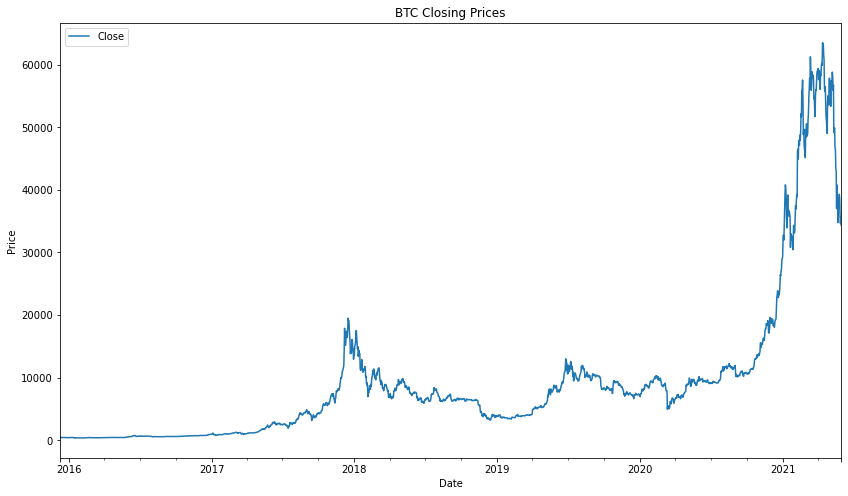

In [6]:
# plotting the Closing Prices
df.plot(figsize=(14,8))
plt.title('BTC Closing Prices')
plt.ylabel('Price')
plt.show()

In [34]:
# train test split
prediction_days = 7
df_train = df.head(-prediction_days)
df_test = df.tail(prediction_days)
training_set = df_train.values
test_set = df_test.values
print(training_set.shape)
print(test_set.shape)

(1993, 1)
(7, 1)


In [35]:
# scale
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00081008],
       [0.00138752],
       [0.00111921],
       ...,
       [0.5887364 ],
       [0.54492758],
       [0.60725658]])

In [37]:
#https://www.udemy.com/course/deeplearning/learn/lecture/8374802#questions/3554002
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
 
n_future = prediction_days #20  # Number of days you want to predict into the future
n_past = 60  # Number of past days you want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future + 1):
    X_train.append(training_set_scaled[i-n_past:i, 0])
    y_train.append(training_set_scaled[i+n_future-1:i+n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
X_train.shape, y_train.shape

((1927, 60), (1927, 1))

In [19]:
range(n_past, len(training_set_scaled) - n_future + 1)

range(60, 1987)

In [39]:
for i in range(n_past, len(training_set_scaled) - n_future + 1):
    print(i,'-', i-n_past, '-', i)

60 - 0 - 60
61 - 1 - 61
62 - 2 - 62
63 - 3 - 63
64 - 4 - 64
65 - 5 - 65
66 - 6 - 66
67 - 7 - 67
68 - 8 - 68
69 - 9 - 69
70 - 10 - 70
71 - 11 - 71
72 - 12 - 72
73 - 13 - 73
74 - 14 - 74
75 - 15 - 75
76 - 16 - 76
77 - 17 - 77
78 - 18 - 78
79 - 19 - 79
80 - 20 - 80
81 - 21 - 81
82 - 22 - 82
83 - 23 - 83
84 - 24 - 84
85 - 25 - 85
86 - 26 - 86
87 - 27 - 87
88 - 28 - 88
89 - 29 - 89
90 - 30 - 90
91 - 31 - 91
92 - 32 - 92
93 - 33 - 93
94 - 34 - 94
95 - 35 - 95
96 - 36 - 96
97 - 37 - 97
98 - 38 - 98
99 - 39 - 99
100 - 40 - 100
101 - 41 - 101
102 - 42 - 102
103 - 43 - 103
104 - 44 - 104
105 - 45 - 105
106 - 46 - 106
107 - 47 - 107
108 - 48 - 108
109 - 49 - 109
110 - 50 - 110
111 - 51 - 111
112 - 52 - 112
113 - 53 - 113
114 - 54 - 114
115 - 55 - 115
116 - 56 - 116
117 - 57 - 117
118 - 58 - 118
119 - 59 - 119
120 - 60 - 120
121 - 61 - 121
122 - 62 - 122
123 - 63 - 123
124 - 64 - 124
125 - 65 - 125
126 - 66 - 126
127 - 67 - 127
128 - 68 - 128
129 - 69 - 129
130 - 70 - 130
131 - 71 - 131
132 - 72 -

692 - 632 - 692
693 - 633 - 693
694 - 634 - 694
695 - 635 - 695
696 - 636 - 696
697 - 637 - 697
698 - 638 - 698
699 - 639 - 699
700 - 640 - 700
701 - 641 - 701
702 - 642 - 702
703 - 643 - 703
704 - 644 - 704
705 - 645 - 705
706 - 646 - 706
707 - 647 - 707
708 - 648 - 708
709 - 649 - 709
710 - 650 - 710
711 - 651 - 711
712 - 652 - 712
713 - 653 - 713
714 - 654 - 714
715 - 655 - 715
716 - 656 - 716
717 - 657 - 717
718 - 658 - 718
719 - 659 - 719
720 - 660 - 720
721 - 661 - 721
722 - 662 - 722
723 - 663 - 723
724 - 664 - 724
725 - 665 - 725
726 - 666 - 726
727 - 667 - 727
728 - 668 - 728
729 - 669 - 729
730 - 670 - 730
731 - 671 - 731
732 - 672 - 732
733 - 673 - 733
734 - 674 - 734
735 - 675 - 735
736 - 676 - 736
737 - 677 - 737
738 - 678 - 738
739 - 679 - 739
740 - 680 - 740
741 - 681 - 741
742 - 682 - 742
743 - 683 - 743
744 - 684 - 744
745 - 685 - 745
746 - 686 - 746
747 - 687 - 747
748 - 688 - 748
749 - 689 - 749
750 - 690 - 750
751 - 691 - 751
752 - 692 - 752
753 - 693 - 753
754 - 69

1383 - 1323 - 1383
1384 - 1324 - 1384
1385 - 1325 - 1385
1386 - 1326 - 1386
1387 - 1327 - 1387
1388 - 1328 - 1388
1389 - 1329 - 1389
1390 - 1330 - 1390
1391 - 1331 - 1391
1392 - 1332 - 1392
1393 - 1333 - 1393
1394 - 1334 - 1394
1395 - 1335 - 1395
1396 - 1336 - 1396
1397 - 1337 - 1397
1398 - 1338 - 1398
1399 - 1339 - 1399
1400 - 1340 - 1400
1401 - 1341 - 1401
1402 - 1342 - 1402
1403 - 1343 - 1403
1404 - 1344 - 1404
1405 - 1345 - 1405
1406 - 1346 - 1406
1407 - 1347 - 1407
1408 - 1348 - 1408
1409 - 1349 - 1409
1410 - 1350 - 1410
1411 - 1351 - 1411
1412 - 1352 - 1412
1413 - 1353 - 1413
1414 - 1354 - 1414
1415 - 1355 - 1415
1416 - 1356 - 1416
1417 - 1357 - 1417
1418 - 1358 - 1418
1419 - 1359 - 1419
1420 - 1360 - 1420
1421 - 1361 - 1421
1422 - 1362 - 1422
1423 - 1363 - 1423
1424 - 1364 - 1424
1425 - 1365 - 1425
1426 - 1366 - 1426
1427 - 1367 - 1427
1428 - 1368 - 1428
1429 - 1369 - 1429
1430 - 1370 - 1430
1431 - 1371 - 1431
1432 - 1372 - 1432
1433 - 1373 - 1433
1434 - 1374 - 1434
1435 - 1375 

1924 - 1864 - 1924
1925 - 1865 - 1925
1926 - 1866 - 1926
1927 - 1867 - 1927
1928 - 1868 - 1928
1929 - 1869 - 1929
1930 - 1870 - 1930
1931 - 1871 - 1931
1932 - 1872 - 1932
1933 - 1873 - 1933
1934 - 1874 - 1934
1935 - 1875 - 1935
1936 - 1876 - 1936
1937 - 1877 - 1937
1938 - 1878 - 1938
1939 - 1879 - 1939
1940 - 1880 - 1940
1941 - 1881 - 1941
1942 - 1882 - 1942
1943 - 1883 - 1943
1944 - 1884 - 1944
1945 - 1885 - 1945
1946 - 1886 - 1946
1947 - 1887 - 1947
1948 - 1888 - 1948
1949 - 1889 - 1949
1950 - 1890 - 1950
1951 - 1891 - 1951
1952 - 1892 - 1952
1953 - 1893 - 1953
1954 - 1894 - 1954
1955 - 1895 - 1955
1956 - 1896 - 1956
1957 - 1897 - 1957
1958 - 1898 - 1958
1959 - 1899 - 1959
1960 - 1900 - 1960
1961 - 1901 - 1961
1962 - 1902 - 1962
1963 - 1903 - 1963
1964 - 1904 - 1964
1965 - 1905 - 1965
1966 - 1906 - 1966
1967 - 1907 - 1967
1968 - 1908 - 1968
1969 - 1909 - 1969
1970 - 1910 - 1970
1971 - 1911 - 1971
1972 - 1912 - 1972
1973 - 1913 - 1973
1974 - 1914 - 1974
1975 - 1915 - 1975
1976 - 1916 

In [40]:
for i in range(n_past, len(training_set_scaled) - n_future + 1):
    print(i,'-', i, '-', i+n_future)

60 - 60 - 67
61 - 61 - 68
62 - 62 - 69
63 - 63 - 70
64 - 64 - 71
65 - 65 - 72
66 - 66 - 73
67 - 67 - 74
68 - 68 - 75
69 - 69 - 76
70 - 70 - 77
71 - 71 - 78
72 - 72 - 79
73 - 73 - 80
74 - 74 - 81
75 - 75 - 82
76 - 76 - 83
77 - 77 - 84
78 - 78 - 85
79 - 79 - 86
80 - 80 - 87
81 - 81 - 88
82 - 82 - 89
83 - 83 - 90
84 - 84 - 91
85 - 85 - 92
86 - 86 - 93
87 - 87 - 94
88 - 88 - 95
89 - 89 - 96
90 - 90 - 97
91 - 91 - 98
92 - 92 - 99
93 - 93 - 100
94 - 94 - 101
95 - 95 - 102
96 - 96 - 103
97 - 97 - 104
98 - 98 - 105
99 - 99 - 106
100 - 100 - 107
101 - 101 - 108
102 - 102 - 109
103 - 103 - 110
104 - 104 - 111
105 - 105 - 112
106 - 106 - 113
107 - 107 - 114
108 - 108 - 115
109 - 109 - 116
110 - 110 - 117
111 - 111 - 118
112 - 112 - 119
113 - 113 - 120
114 - 114 - 121
115 - 115 - 122
116 - 116 - 123
117 - 117 - 124
118 - 118 - 125
119 - 119 - 126
120 - 120 - 127
121 - 121 - 128
122 - 122 - 129
123 - 123 - 130
124 - 124 - 131
125 - 125 - 132
126 - 126 - 133
127 - 127 - 134
128 - 128 - 135
129 - 129

663 - 663 - 670
664 - 664 - 671
665 - 665 - 672
666 - 666 - 673
667 - 667 - 674
668 - 668 - 675
669 - 669 - 676
670 - 670 - 677
671 - 671 - 678
672 - 672 - 679
673 - 673 - 680
674 - 674 - 681
675 - 675 - 682
676 - 676 - 683
677 - 677 - 684
678 - 678 - 685
679 - 679 - 686
680 - 680 - 687
681 - 681 - 688
682 - 682 - 689
683 - 683 - 690
684 - 684 - 691
685 - 685 - 692
686 - 686 - 693
687 - 687 - 694
688 - 688 - 695
689 - 689 - 696
690 - 690 - 697
691 - 691 - 698
692 - 692 - 699
693 - 693 - 700
694 - 694 - 701
695 - 695 - 702
696 - 696 - 703
697 - 697 - 704
698 - 698 - 705
699 - 699 - 706
700 - 700 - 707
701 - 701 - 708
702 - 702 - 709
703 - 703 - 710
704 - 704 - 711
705 - 705 - 712
706 - 706 - 713
707 - 707 - 714
708 - 708 - 715
709 - 709 - 716
710 - 710 - 717
711 - 711 - 718
712 - 712 - 719
713 - 713 - 720
714 - 714 - 721
715 - 715 - 722
716 - 716 - 723
717 - 717 - 724
718 - 718 - 725
719 - 719 - 726
720 - 720 - 727
721 - 721 - 728
722 - 722 - 729
723 - 723 - 730
724 - 724 - 731
725 - 72

1452 - 1452 - 1459
1453 - 1453 - 1460
1454 - 1454 - 1461
1455 - 1455 - 1462
1456 - 1456 - 1463
1457 - 1457 - 1464
1458 - 1458 - 1465
1459 - 1459 - 1466
1460 - 1460 - 1467
1461 - 1461 - 1468
1462 - 1462 - 1469
1463 - 1463 - 1470
1464 - 1464 - 1471
1465 - 1465 - 1472
1466 - 1466 - 1473
1467 - 1467 - 1474
1468 - 1468 - 1475
1469 - 1469 - 1476
1470 - 1470 - 1477
1471 - 1471 - 1478
1472 - 1472 - 1479
1473 - 1473 - 1480
1474 - 1474 - 1481
1475 - 1475 - 1482
1476 - 1476 - 1483
1477 - 1477 - 1484
1478 - 1478 - 1485
1479 - 1479 - 1486
1480 - 1480 - 1487
1481 - 1481 - 1488
1482 - 1482 - 1489
1483 - 1483 - 1490
1484 - 1484 - 1491
1485 - 1485 - 1492
1486 - 1486 - 1493
1487 - 1487 - 1494
1488 - 1488 - 1495
1489 - 1489 - 1496
1490 - 1490 - 1497
1491 - 1491 - 1498
1492 - 1492 - 1499
1493 - 1493 - 1500
1494 - 1494 - 1501
1495 - 1495 - 1502
1496 - 1496 - 1503
1497 - 1497 - 1504
1498 - 1498 - 1505
1499 - 1499 - 1506
1500 - 1500 - 1507
1501 - 1501 - 1508
1502 - 1502 - 1509
1503 - 1503 - 1510
1504 - 1504 

# creating a data structure with 60 timesteps and 1 output
days_used = 60
X_train = []
y_train = []
for i in range(days_used, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-days_used:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
X_train.shape

(1927, 60)

In [42]:
y_train.shape

(1927, 1)

In [43]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [47]:
# building the RNN

# Initialising the RNN
regressor = Sequential()

# Adding the first layer of the LSTM and some Drouput regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) #, activation='sigmoid'
# units is the number of neurons. 50 neurones is high dimensionality.
# return_sequences is because we are using stacked RNN, so another layer will come afterwards
regressor.add(Dropout(0.2))
# 20% of the neurons will be dropped/ignored during training (20% of 50, then 10 will be ignored)

# Adding the second LSTM layer and some Drouput regularisation
regressor.add(LSTM(units=50, return_sequences=True)) #, activation='sigmoid'
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Drouput regularisation
regressor.add(LSTM(units=50, return_sequences=True)) #, activation='sigmoid'
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Drouput regularisation
regressor.add(LSTM(units=50, return_sequences=False)) #, activation='sigmoid'
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error') #, metrics=['accuracy'])
#try also with RMSprop

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size=30, epochs=100) #100/32 / 250

Epoch 1/100
65/65 [==============================] - 38s 126ms/step - loss: 0.0113
Epoch 2/100
65/65 [==============================] - 8s 127ms/step - loss: 0.0034
Epoch 3/100
65/65 [==============================] - 8s 126ms/step - loss: 0.0031
Epoch 4/100
65/65 [==============================] - 8s 128ms/step - loss: 0.0029
Epoch 5/100
65/65 [==============================] - 8s 129ms/step - loss: 0.0025
Epoch 6/100
65/65 [==============================] - 8s 128ms/step - loss: 0.0024
Epoch 7/100
65/65 [==============================] - 9s 131ms/step - loss: 0.0030
Epoch 8/100
65/65 [==============================] - 9s 133ms/step - loss: 0.0021
Epoch 9/100
65/65 [==============================] - 9s 133ms/step - loss: 0.0022
Epoch 10/100
65/65 [==============================] - 8s 122ms/step - loss: 0.0019
Epoch 11/100
65/65 [==============================] - 8s 131ms/step - loss: 0.0020
Epoch 12/100
65/65 [==============================] - 8s 131ms/step - loss: 0.0016
Epoch 13/100

65/65 [==============================] - 3s 51ms/step - loss: 6.5918e-04
Epoch 99/100
65/65 [==============================] - 3s 52ms/step - loss: 6.7648e-04
Epoch 100/100
65/65 [==============================] - 3s 51ms/step - loss: 7.2454e-04


In [106]:
# getting the real price
#np_total = np.concatenate((np_train, np_test), axis=0)
#inputs = np_total[len(np_total)-len(np_test)-days_used:]
inputs = test_set
inputs = sc.transform(inputs)

X_test = []
for i in range(days_used, days_used+len(np_test)):
    X_test.append(inputs[i-days_used:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[39042.062],
       [40071.785],
       [41083.09 ],
       [40872.074],
       [39112.203],
       [37751.312],
       [37951.176]], dtype=float32)

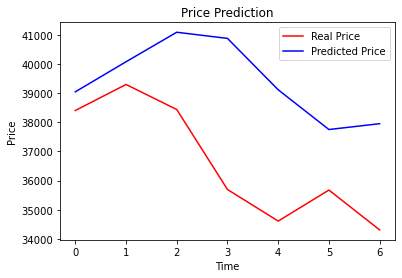

In [108]:
# visualising the results
plt.plot(np_test, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Improving the RNN**

Here are different ways to improve the RNN model:

Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.

Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

**Evaluating the RNN**

As seen in the practical lectures, the RNN we built was a regressor. Indeed, we were dealing with Regression because we were trying to predict a continuous outcome (the Google Stock Price). For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

Nevertheless if you are interested in the code that computes the RMSE for our Stock Price Prediction problem, please find it just below:

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
Then consider dividing this RMSE by the range of the Google Stock Price values of January 2017 (that is around 800) to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.

Enjoy Deep Learning!